<a href="https://colab.research.google.com/github/aseemdandgaval/Pet-Breed-Classifier/blob/main/Pet_Breed_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# **The Pet Breed Classifier**

* This is a Deep Learning Model which will classify between 37 breeds of cats and dogs.
* It may not give senisble answers for breeds other than the ones included in the model.
* The breeds this model can classify are:

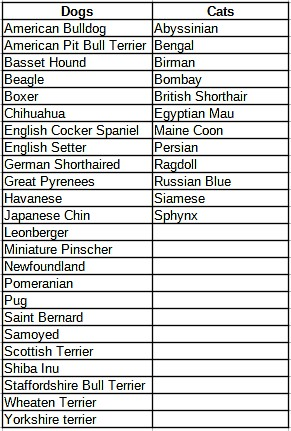

* You can either select a photo from your device folders or take an image from the camera.

In [ ]:
path = Path()
learn_inf = load_learner(path/'Pet_Breed_Classifier.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [ ]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_upload.observe(on_data_change, names=['data'])

In [ ]:
display(VBox([widgets.Label('Select your breed!'), btn_upload, out_pl, lbl_pred]))